<font color="#2f0aad"><h1 align="left">Algoritmos de optimización</h1></font>
<font color="#2f0aad"><h2 align="left">Ejercicios y retos de la asignatura</h2></font> 

#### Profesor: Juan Francisco Vallalta Rueda

Nombre: Diocles Germán Avendaño Ponce <br>
URL: https://drive.google.com/file/d/1p1WgijBIPFX93KO0zJjwk9PuZP9PkhKv/view?usp=sharing

GitHub:https://github.com/geharpz/algoritmos_optimizacion_miar2023/blob/main/src/AG1/Algoritmos_AG1_Diocles_German_Avendano_Ponce.ipynb

# Ejercicios VC 1

## Implementa  el algoritmo de Euclides para el cálculo del máximo común divisor de dos números enteros

In [15]:
# Algoritmos de Euclides.
# Definimos la función Euclides para el cálculo del máximo común divisor
def mcd(n1, n2):
    # Bucle while que se ejecuta mietras el restos sea diferente de 0
    while n1 % n2 != 0:
        # Asignación de las variables
        n1, n2 = n2, n1 % n2
    # Retonarmos el mcd de los 2 parametros
    return n2


In [19]:
# Prueba del algoritmo
n1, n2 = 100, 40
print(f"El máximo común divisor de {n1} y  {n2} es: {mcd(n1, n2)}")


El máximo común divisor de 100 y  40 es: 20


## Implementa el algoritmo de Herón para el cálculo de la raiz cuadrada de un número entero. Calcula la raiz cuadrada de 13 con un error inferior a 0.000001

In [3]:
# Algoritmo de Herón
# Importamos la librería math
import math

def heron_square_root(number, error=0.000001):
    if number < 0:
        raise ValueError("El número debe ser positivo")
    
    if number == 0:
        return 0
    
    x = number
    while True:
        root_candidate = 0.5 * (x + number / x)
        if abs(root_candidate - x) < error:
            return root_candidate
        x = root_candidate

La raíz cuadrada de 13 es aproximadamente 3.6055512754639905


In [4]:
# Prueba del algoritmo
# Declaramos el valor de n a calcular la raíz
n = 13
# Ejemplo: Calcular la raíz cuadrada de 13 con un error inferior a 0.000001
print(f"Raíz cuadrada con algoritmo de Herón: {heron_square_root(n)}")
print(f"Raíz cuadrada con librería math sqrt: {math.sqrt(n)}")


Raíz cuadrada con algoritmo de Herón: 3.6055512754639905
Raíz cuadrada con librería math sqrt: 3.605551275463989


# Ejercicios VC 2

## Implementa  una solución para el problema del cambio de moneda en un sistema monetario con las siguientes monedas: {1, 2, 5, 10, 20 , 50}

In [8]:
# Problema de cambio de monedas
# Se define la función calculate_money_exchange
def calculate_money_exchange(amount):
    # Se define las denominaciones de monedas a usar
    denomination_list = [1, 2, 5, 10, 20 , 50]
    # Se declara una lista para almacenar las monedas a usar para devolver el cambio
    selected_coin = []
    selected_index = []
    # Se copia el valor del monto a devolver en monedas
    aux_amount = amount
    # Variable para controlar le monto que se va pagando
    pay = 0
    # index para recorrer la lista de nominaciones de monedas
    index = len(denomination_list) - 1

    while aux_amount > 0:
        # Se Actualiza el valor pendiente por pagar
        pay = aux_amount - denomination_list[index]
        # Si la resta de lo faltante por pagar y la nominación actual de moneda no da un número negativo
        if pay >=0:
            # Se actualiza la variable auxiliar del valor pagado con lo faltante por pagar
            aux_amount = pay
            # Se agrega a la lista de monedas seleccionada la moneda utilizada para devoelver el cambio
            selected_coin.append(denomination_list[index])
            selected_index.append(index)
        else:
             # Si la resta entre lo faltante por pagar y la nominación de la moneda actual da un número negativo entonce se corre el índice a una moneda con menor nominación
             index -=1
    # Se retorna la lista de monedas usadas para devolver el cambio
    return selected_coin, selected_index

In [9]:
# Prueba del algoritmo
# Se declara el cambio que debe devolverse
money = 93
selected_coin, selected_index = calculate_money_exchange(money)
print(f"Nominaciones de monedas usadas para devolver el cambio: {selected_coin}")
print(f"Indices de la nominaciones de monedas usadas para devolver el cambio: {selected_index}")

Nominaciones de monedas usadas para devolver el cambio: [50, 20, 20, 2, 1]
Indices de la nominaciones de monedas usadas para devolver el cambio: [5, 4, 4, 1, 0]


## VC-4 Descenso por gradiente

## Ejercicio VC 4:
+ 1. Considere un conjunto de 100 puntos de datos y explique el comportamiento del algoritmo.
+ 2. ¿Cómo podríamos solucionar este comportamiento?

### Descenso de gradiente estocástico

La última función evalúa la función objetivo $f_\mathbf{w}$ con respecto a cada parámetro/característica en cada paso.

Si el conjunto de datos es grande, esta estrategia es demasiado costosa. En este caso usaremos una estrategia llamada **SGD** (*Descenso de gradiente estocástico*). Consiste en reemplazar el gradiente real (calculado a partir de todo el conjunto de datos) por una estimación del mismo (calculado a partir de un subconjunto de datos seleccionado aleatoriamente).

Luego, calculamos la estimación del gradiente (y nos movemos hacia el mínimo) usando solo **una muestra de datos** (o una pequeña muestra de datos). Encontramos el mínimo iterando esta estimación de gradiente sobre el conjunto de datos.

Una iteración completa sobre el conjunto de datos se denomina **época**. Durante una época, los datos deben usarse en un orden aleatorio.

Si aplicamos este método tenemos algunas garantías para encontrar el mínimo.

In [44]:
import numpy as np
x = range(10)
y = [2*i for i in x]
data = list(zip(x,y))

def in_random_order(data):
    import random
    indexes = [i for i,_ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]
        
for (x_i,y_i) in in_random_order(data):
    print(x_i,y_i) 

9 18
2 4
3 6
5 10
7 14
6 12
4 8
8 16
1 2
0 0


In [45]:
def gradient_f_SGD(x,y,w):
    import numpy as np
    return 2*w*(np.array(x)**2) - 2*np.array(x)*np.array(y) #Note there is no sum of elements

def SGD(target_f, gradient_f, x, y, alpha_0=0.001):
    import numpy as np
    import random
    data = list(zip(x,y))
    w = random.random()
    alpha = alpha_0
    min_w, min_val = float('inf'), float('inf')
    iteration_no_increase = 0
    alpha_vect = []
    min_w_vect = []
    while iteration_no_increase < 100: 
        val = sum(target_f(x_i, y_i, w) for x_i,y_i in data) # full iteration of the global error with updated w
        if val < min_val: 
            # the global error gets lower with updated w
            min_w, min_val = w, val
            iteration_no_increase = 0
            alpha = alpha_0
        else:
            # the global error is not improving -> decrease alpha temporarily (until out of possible local minima)
            iteration_no_increase += 1
            alpha *= 0.9 #decrease alpha
        for x_i, y_i in in_random_order(data): 
            gradient_i = gradient_f(x_i, y_i, w)  #gradient evaluation at each point
            w = np.array(w) - (alpha *  np.array(gradient_i)) # update w
        min_w_vect.append(w)
        alpha_vect.append(alpha)
    return min_w_vect, alpha_vect

w=  [1.9999999999999996, 1.9999999999999996, 1.9999999999999996, 1.9999999999999996, 1.9999999999999996]


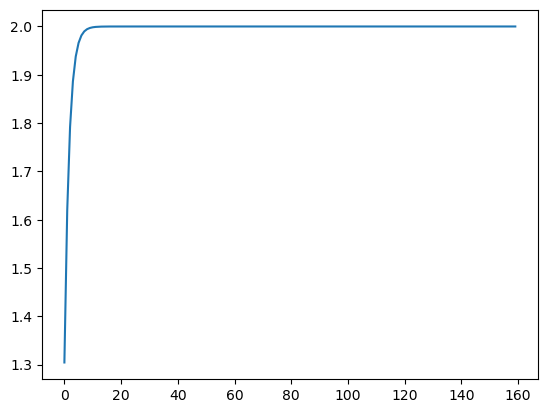

In [46]:
min_w_vect, alpha_vect = SGD(target_f, gradient_f_SGD, x, y, 0.001)
print("w= ",min_w_vect[-5:])
plt.plot(min_w_vect)
plt.show()

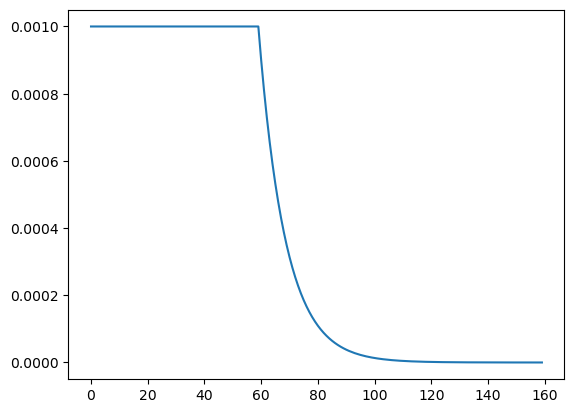

In [47]:
plt.plot(alpha_vect)
plt.show()

## Mini-batch Gradient Descent

En el código, el descenso general del gradiente por lotes se parece a esto:

```python
nb_epochs = 100
for i in range(nb_epochs):
    grad = evaluate_gradient(target_f, data, w)
    w = w - learning_rate * grad
```

Para un número predefinido de épocas, primero calculamos el vector de gradiente de la función de destino para todo el conjunto de datos w.r.t. nuestro vector de parámetros.

El descenso de gradiente estocástico (SGD), por el contrario, realiza una actualización de parámetros para cada ejemplo y etiqueta de entrenamiento:

```python
nb_epochs = 100
for i in range(nb_epochs):
    np.random.shuffle(data)
    for example in data:
        grad = evaluate_gradient(target_f, example, w)
        w = w - learning_rate * grad
```
El descenso de gradiente de minilotes finalmente toma lo mejor de ambos mundos y realiza una actualización para cada minilote de $n$ ejemplos de entrenamiento:

```python
nb_epochs = 100
for i in range(nb_epochs):
  np.random.shuffle(data)
  for batch in get_batches(data, batch_size=50):
    grad = evaluate_gradient(target_f, batch, w)
    w = w - learning_rate * grad
```

Minibatch SGD tiene la ventaja de que funciona con una estimación del gradiente ligeramente menos ruidosa. Sin embargo, a medida que aumenta el tamaño del minilote, el número de actualizaciones realizadas por cálculo realizado disminuye (eventualmente se vuelve muy ineficiente, como el descenso del gradiente del lote).

Existe una compensación óptima (en términos de eficiencia computacional) que puede variar según la distribución de datos y las particularidades de la clase de función considerada, así como la forma en que se implementan los cálculos.

## Descenso de gradiente y regresión lineal

El modelo de regresión lineal asume una relación lineal entre los datos:

$$ y_i = w_1 x_i + w_0 $$

Generemos un conjunto de datos más realista (con ruido), donde $w_1 = 2$ y $w_0 = 0$:

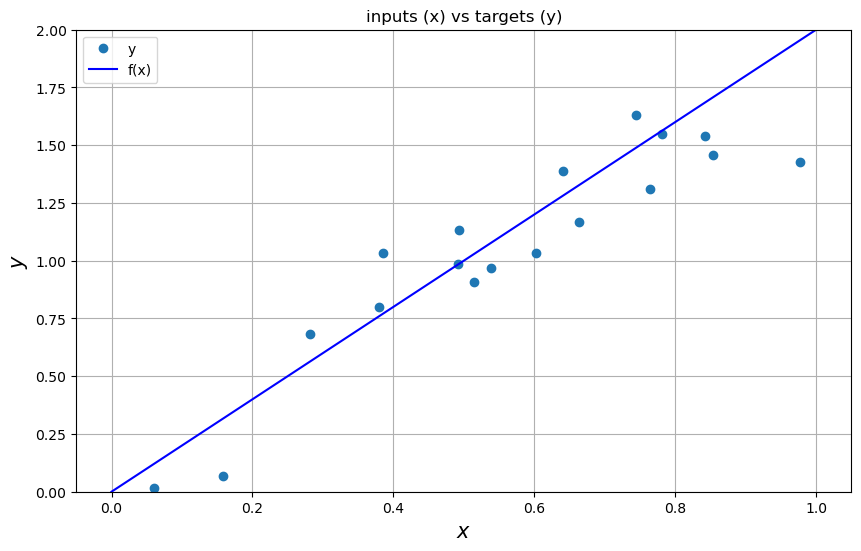

In [48]:
import numpy as np
x = np.random.uniform(0,1,20)

def f(x): return x*2

noise_variance =0.2
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

plt.plot(x, y, 'o', label='y')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)
plt.ylim([0,2])
plt.title('inputs (x) vs targets (y)')
plt.grid()
plt.legend(loc=2)
plt.gcf().set_size_inches((10,6))
plt.show()

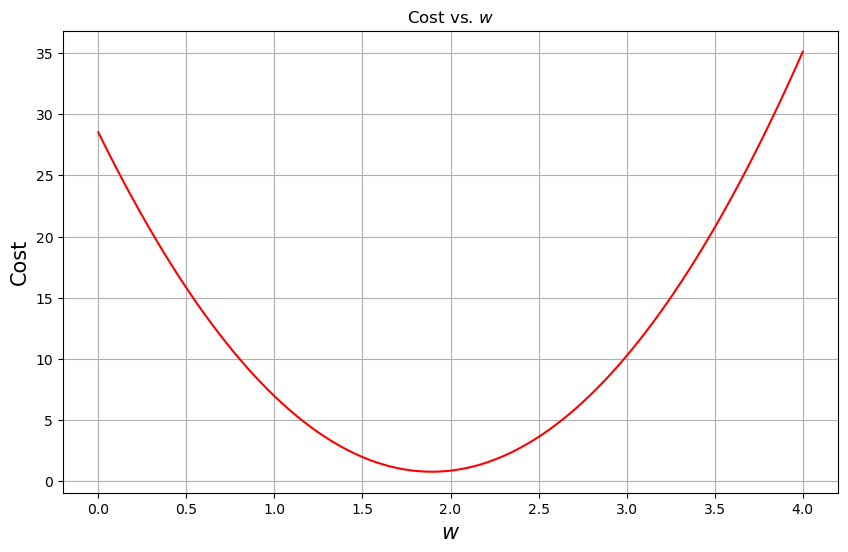

In [49]:
# Our cost function
def cost(y, t): return ((t - y)**2).sum()

ws = np.linspace(0, 4, num=100)  
cost_ws = np.zeros(ws.shape)
for ind,w in enumerate(ws):
    cost_ws[ind]=cost(x*w, y) 
    
# Ploting the cost function for different values of w
plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('Cost', fontsize=15)
plt.title('Cost vs. $w$')
plt.grid()
plt.gcf().set_size_inches((10,6))
plt.show()

# Reto VC-1

## Implementa el algoritmo de la Criba de Erastótenes para encontrar número primos. Encuentra los números primos entre los 10.000 primeros números naturales

In [10]:
# Criba de Erastótenes
# Se define función criba de Erastótenes
def criba_eras(n):
    # Se define una lista para almacenar los números primos
    prime_list = []
    # Se define una lista para almacenar los números no primos
    no_prime_list = []
    # Se define un for que va de 2 hasta n+1
    for i in range(2, n + 1):

        if i not in no_prime_list:
            # Se agrega a la lista de primos aquellos números que no se encuentre en la lista de los no primos
            prime_list.append(i)
            # Se define un for que va desde i*i hasta n+1 con incrementos de valor de i
            for j in range(i * i, n + 1, i):
                # Se agrega a la lista de los no primos el valor actual de j
                no_prime_list.append(j)
   # Se retorna la lista de los números primos
    return prime_list

Implemetación de la función Criba de Erastótenes

In [11]:
# Variable que almacena el número especifico hats donde calcular los números primos
n = 10000
print(f"Números primos del 2 hasta: {n}:\n{criba_eras(n)}")

Números primos del 2 hasta: 10000:
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 118

# Reto VC-2

## Opción 1: Implementa una solución al problema de las 8 reinas en un tablero 8x8

In [12]:
# Ocho reinas
# Escribe aquí tu código
# Se importan librerías
import matplotlib.pyplot as plt

# Variable global para contar cuántas combitaciones de solución se procesan  
count = 0
# Se define función paint_graph_board para graficar el tablero con la solución de las 8 reinas
def paint_graph_board(board):
    global count
    # Variable count aumenta en 1
    count += 1
    # Se imprime el número de combinación de solución actual
    print(f"Combination : #{count}")
    # For para pintar las líneas de tablero
    for x in range(9):
        plt.plot([0, 8],[x, x], color = 'blue')
        plt.plot([x, x],[0, 8], color = 'blue')
    # For para pintar las reinas en el tablero    
    for x in range(8):
        if board[x] != -1:
            plt.plot([x+0.5],[board[x]+0.5], marker = ".", markersize=50, color = 'black')
    plt.show()


# Se define función paint_graph_board para realizar la posibles combinaciones de solución de las 8 reinas    
def add_queen(board, queen):
    # Se setea en 0 la posición de la reina actual
    board[queen] = 0
    #
    while board[queen] < 8:
        # Se inicializa la variable correct en True
        correct = True
        # Se inicializa el index en 0
        index = 0
        # Bucle que controla el index hasta llegar a la reina actual correcta
        while index < queen and correct:
            # Valida si el indice actual esta en una posición errónea
            if board[index] == board[queen] or abs(index-queen) == abs(board[index] - board[queen]):
                # Se pone en false la variable correct
                correct = False
            # Índice aumenta en 1
            index += 1
        # Condición que verifica si el índice está en una posición correcta
        if correct:
            # Condición que verifica si ya se han encontrados las posiciones adecuadas para las 8 reinas
            if queen == 7:
                # Se pinta el tablero con una combinación correcta de reinas
                paint_graph_board(board)
            else:
                # Se llama al método de forma recursiva
                add_queen(board, queen+1)

        # Se cambia de posición a la reina actual
        board[queen] += 1

In [ ]:
# Se inicializa una lista con 8 elementos con -1 
board = [-1]*8
# Se llama al método add_queen
add_queen(board, 0)

## Opción 2: Implementa una solución del problema de las Torres de Hanoi para un número arbitrario n de fichas

In [13]:
# Torres de Hanoy
# Escribe aquí tu código
# Se define la función towers_hanoi
def towers_hanoi(n, stick1, stick2, stick3):
    # Se valida si n es 1 se imprime
    if n == 1:
        # Se imprime el valor de n el cual representa el disco actual y los palos del A al C
        print(f"------------ {n}, {stick1}, {stick2}, {stick3} ------------")
        # Se mueve el disco 1 del palo A al B
        print(f"Mueve el disco 1 de {stick1} a {stick2}")
         # Se imprime el valor de n el cual representa el disco actual y los palos del A al C
        print(f"------------ {n}, {stick1}, {stick2}, {stick3} ------------")
        # Se realiza un return
        return
     # Se imprime el valor de n el cual representa el disco actual y los palos del A al C
    print(f"------------ {n}, {stick1}, {stick2}, {stick3} ------------")
    # Se realiza una llamado recursivo de la función towers_hanoi
    towers_hanoi(n-1, stick1, stick3, stick2)
     # Se imprime el valor de n el cual representa el disco actual y los palos del A al C
    print(f"------------ {n}, {stick1}, {stick2}, {stick3} ------------")
    # Se mueve el disco actual del palo A al B
    print(f"Mueve el disco {n} de {stick1} a {stick2}")
     # Se imprime el valor de n el cual representa el disco actual y los palos del A al C
    print(f"------------ {n}, {stick1}, {stick2}, {stick3} ------------")
    # Se realiza una llamado recursivo de la función towers_hanoi
    towers_hanoi(n-1, stick1, stick2, stick3)
     # Se imprime el valor de n el cual representa el disco actual y los palos del A al C
    print(f"------------ {n}, {stick1}, {stick2}, {stick3} ------------")

In [14]:
# Se declara el valor de n el cual representa los disco
n = 3
# Se llama la función towers_hanoi
towers_hanoi(n, 'A', 'B', 'C')

------------ 3, A, B, C ------------
------------ 2, A, C, B ------------
------------ 1, A, B, C ------------
Mueve el disco 1 de A a B
------------ 1, A, B, C ------------
------------ 2, A, C, B ------------
Mueve el disco 2 de A a C
------------ 2, A, C, B ------------
------------ 1, A, C, B ------------
Mueve el disco 1 de A a C
------------ 1, A, C, B ------------
------------ 2, A, C, B ------------
------------ 3, A, B, C ------------
Mueve el disco 3 de A a B
------------ 3, A, B, C ------------
------------ 2, A, B, C ------------
------------ 1, A, C, B ------------
Mueve el disco 1 de A a C
------------ 1, A, C, B ------------
------------ 2, A, B, C ------------
Mueve el disco 2 de A a B
------------ 2, A, B, C ------------
------------ 1, A, B, C ------------
Mueve el disco 1 de A a B
------------ 1, A, B, C ------------
------------ 2, A, B, C ------------
------------ 3, A, B, C ------------


# Reto VC 4
## Implemente el código del descenso por gradiente para la regresión lineal.

In [42]:
# Se importan librerías
import numpy as np

# Definición de método de Descenso de Gradiente para funciones de n variables.
def gradiente_descendente(grad_f, x0, ratio_aprendizaje, tol, maxit):
    x = x0
    for iteraciones in range(maxit):
        gradiente = grad_f(x)  # Se calcula el gradiente en el punto actual
        if np.linalg.norm(gradiente, ord=2) < tol:
            break
        # Se actualiza el punto utilizando la regla del descenso de gradiente
        x = x - ratio_aprendizaje * gradiente

# Se retorna array con aproximación del punto x que cumple f'(x) ≈ 0 y el numero de iteraciones
    return x, iteraciones

# Función objetivo -> f(x) = x^4 + 2x^3 - 10x^2 + 5
def f(x):
    return x**4 + 2*x**3 - 10*x**2 + 5

# Gradiente de la función objetivo, calcula el gradiente de una función en un punto dado utilizando diferencias finitas.
def grad_f(x):
    return np.array([4*x[0]**3 + 6*x[0]**2 - 20*x[0]])

In [50]:
# Parámetros de entrada
x0 = np.array([3])
# Tasa de aprendizaje
ratio_aprendizaje = 0.001
# Tolerancia para finalizar el proceso
tol = 1e-12
# Número máximo de iteraciones
maxit = int(1e5)

# Se llama al método de descenso de gradiente
approx_solution, iteraciones = gradiente_descendente(grad_f, x0, ratio_aprendizaje, tol, maxit)

# Se imprime la solución aproximada
print(f"Aproximación de la solución: {approx_solution[0]}")
# Se imprime el número de iteraciones efectuadas
print(f"Número de iteraciones: {iteraciones}")

Aproximación de la solución: 1.6084952830141837
Número de iteraciones: 991


# Reto VC 5
## Optimización de la función $$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$

In [64]:
import math
# Definimos la función a optimizar
def f(x, y):
    return math.sin(1/2 * x**2 - 1/4 * y**2 + 3) * math.cos(2 * x + 1 - math.exp(y))

# Definimos la función de descenso por gradiente 
def gradient_descent(f, x, y, learning_rate=0.01, max_iters=1000, tol=1e-6):
    # f: función a optimizar
    # x, y: valores iniciales para las variables
    # learning_rate: tasa de aprendizaje
    # max_iters: número máximo de iteraciones
    # tol: tolerancia para la convergencia

    for i in range(max_iters):
        # Calcular el gradiente de la función en el punto actual
        df_dx = math.cos(1/2 * x**2 - 1/4 * y**2 + 3) * x * math.sin(2 * x + 1 - math.exp(y)) * 2
        df_dy = -math.cos(1/2 * x**2 - 1/4 * y**2 + 3) * y / 2 * math.sin(2 * x + 1 - math.exp(y)) * math.exp(y)
        gradient = (df_dx, df_dy)

        # Actualizar las variables
        x_new = x - learning_rate * gradient[0]
        y_new = y - learning_rate * gradient[1]

        # Comprobar la convergencia
        if abs(f(x_new, y_new) - f(x, y)) < tol:
            break
        # Actualizar las variables
        x, y = x_new, y_new

    return x, y

In [62]:
# Obtenemos el resultado del la función descenso por gradiente
x_min, y_min = gradient_descent(f, 1, 1)
print("Mínimo local encontrado en x = {}, y = {}: {}".format(x_min, y_min, f(x_min, y_min)))

Mínimo local encontrado en x = 1.9131816434176026, y = 0.6866324652324391: 0.9546714401126345
